# Importing necessary Libraries

In [185]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
import logging
from datetime import datetime

In [186]:
# Setup logging
os.makedirs('./models/texts', exist_ok=True); logging.basicConfig(filename='./models/texts/logging.txt', level=logging.INFO)

In [187]:
#  Loading datasets

df = pd.read_csv('../datasets/gymDatasets.csv')

In [188]:
df.head(10)

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
5,5,Decline band press sit-up,The decline band press sit-up is a weighted co...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
6,6,FYR2 Banded Frog Pump,NaN,Strength,Abdominals,Bands,Intermediate,NaN,NaN
7,7,Band low-to-high twist,The band low-to-high twist is a core exercise ...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
8,8,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average
9,9,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average


In [189]:
df.tail(10)

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2908,2908,30 Arms Close-Grip Push-Up,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN
2909,2909,30 Arms BFR Close-Grip Push-Up,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN
2910,2910,Supine Chest Throw,NaN,Plyometrics,Triceps,Medicine Ball,Beginner,8.2,Average
2911,2911,Decline EZ-bar skullcrusher,The decline EZ-bar skullcrusher is a popular e...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.3,Average
2912,2912,EZ-Bar Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,Average
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2917,2917,30 Arms EZ-Bar Skullcrusher,NaN,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


#  Preprocessing

In [190]:
df.fillna(method='ffill', inplace=True)
df

C:\Users\biraj\AppData\Local\Temp\ipykernel_10072\3303779087.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average


In [191]:
# Encoding the categorical variables

label_encoder = {}

for columns in ['Type', 'BodyPart', 'Equipment', 'Level']:
    le = LabelEncoder()
    df[columns] = le.fit_transform(df[columns])
    label_encoder[columns] = le
    logging.info('Encoded %s with classes: %s', columns, le.classes_)


In [192]:
#  normalize

scaler = StandardScaler()
df[['Rating']] = scaler.fit_transform(df[['Rating']])
# print(df[['Rating']])

In [193]:
# split two parts

X = df.drop(['Title', 'Desc', 'RatingDesc'], axis = 1)   # feature selection
y = df['Rating']    # target variables

#  Splitting into Train-Test split 


In [194]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logging.info("Train and Test shapes: %s %s", X_train.shape, X_test.shape)

# Model training 


### Linear Regression


In [195]:

def linearRegression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    logging.info("Linear Regression MSE: %s", mse)
    return model

### Support Vector Machine

In [196]:
def svmFunc(X_train, y_train, X_test, y_test):
    model = SVR(kernel='rbf')  # Use SVR instead of svr
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    logging.info("SVM MSE: %s", mse)
    return model

### XGBoost 

In [197]:
def xgboostFunc(X_train, y_train, X_test, y_test):
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    logging.info("XGBoost MSE: %s", mse)
    return model


### Random Forest

In [198]:
def randomForest(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    logging.info("Random Forest MSE: %s", mse)
    return model


### Stacking

In [199]:
def stacking(X_train, y_train, X_test, y_test):
    base_models = [
        ('linear', LinearRegression()),
        ('svm', SVR(kernel='rbf')),
        ('xgboost', XGBRegressor(objective='reg:squarederror')),
        ('random_forest', RandomForestRegressor())
    ]
    model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    logging.info("Stacking MSE: %s", mse)
    return model


In [200]:
# # Run models
# linear_model = linearRegression(X_train, y_train, X_test, y_test)
# svm_model = svmFunc(X_train, y_train, X_test, y_test)
# xgboost_model = xgboostFunc(X_train, y_train, X_test, y_test)
# random_forest_model = randomForest(X_train, y_train, X_test, y_test)
# stacking_model = stacking(X_train, y_train, X_test, y_test)

# print(linear_model)
# print(svm_model)
# print(xgboost_model)

print("Linear Regression MSE:", mean_squared_error(y_test, linear_model.predict(X_test)))
print("SVM MSE:", mean_squared_error(y_test, svm_model.predict(X_test)))
print("XGBoost MSE:", mean_squared_error(y_test, xgboost_model.predict(X_test)))
print("Random Forest MSE:", mean_squared_error(y_test, random_forest_model.predict(X_test)))
print("Stacking MSE:", mean_squared_error(y_test, stacking_model.predict(X_test)))
print("RNN MSE:", mean_squared_error(y_test, rnn_model.predict(np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)))))



Linear Regression MSE: 6.851364907600222e-31
SVM MSE: 0.93360184135939
XGBoost MSE: 1.5214750451161464e-06
Random Forest MSE: 3.7525298853500113e-06
Stacking MSE: 5.446490938760287e-30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RNN MSE: 1.106873812525783e-05


# RNN models

In [201]:
def rnnModel(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(32),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [202]:
def runRNN(X_train, y_train, X_test, y_test):
    X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
    model = rnnModel((X_train.shape[1], 1))
    model.fit(X_train_rnn, y_train, epochs=100, validation_split=0.2, batch_size=32)
    predictions = model.predict(np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)))
    mse = mean_squared_error(y_test, predictions)
    logging.info("RNN MSE: %s", mse)
    return model

In [203]:
rnn_model  = runRNN(X_train, y_train, X_test, y_test)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.9877 - mae: 0.9453 - val_loss: 0.8624 - val_mae: 0.8690
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.7432 - mae: 0.7960 - val_loss: 0.0398 - val_mae: 0.1567
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0145 - mae: 0.0860 - val_loss: 0.0016 - val_mae: 0.0230
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0019 - mae: 0.0234 - val_loss: 9.1786e-04 - val_mae: 0.0162
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.8881e-04 - mae: 0.0177 - val_loss: 8.6956e-04 - val_mae: 0.0190
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6095e-04 - mae: 0.0153 - val_loss: 4.8306e-04 - val_mae: 0.0114
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.4501e-04 - mae: 0.0133 - val_loss: 4.8094e-04 - val_mae: 0.0150
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.1970e-04 - mae: 0.0133 - val_loss: 8.5782e-04 - val_mae: 0.0248
Epoch 9/100
59/59 ━━

## Visualization

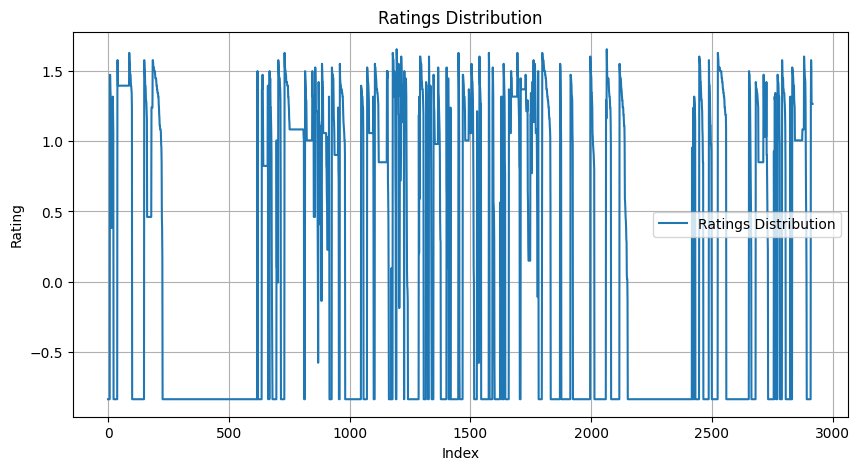

In [204]:
plt.figure(figsize=(10, 5))
plt.plot(df['Rating'], label='Ratings Distribution')
plt.title('Ratings Distribution')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.legend()
plt.grid()
plt.show()


#  Applying Unit Testing

In [205]:
def test_data_loading():
    try:
        assert os.path.exists('../datasets/gymDatasets.csv'), "Dataset not found!"
        data = pd.read_csv('../datasets/gymDatasets.csv')
        assert not data.empty, "Dataframe is empty!"
        print("Data loading test passed.")
        logging.info("Data loading test passed.")
    except AssertionError as e:
        print(f"Data loading test failed: {e}")

def test_model_performance(model, model_name):
    try:
        assert model is not None, f"{model_name} is not defined!"
        print(f"{model_name} test passed.")
        logging.info(f"{model_name} test passed.")
    except AssertionError as e:
        print(f"{model_name} test failed: {e}")

# Results

In [206]:
test_data_loading()
test_model_performance(linear_model, "Linear Regression")
test_model_performance(svm_model, "SVM")
test_model_performance(xgboost_model, "XGBoost")
test_model_performance(random_forest_model, "Random Forest")
test_model_performance(stacking_model, "Stacking")
test_model_performance(rnn_model, "RNN")

Data loading test passed.
Linear Regression test passed.
SVM test passed.
XGBoost test passed.
Random Forest test passed.
Stacking test passed.
RNN test passed.
